### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
df = pd.read_csv("C:/Users/Rohan/Downloads/A20471561_CollectedData_annotation.csv")

In [3]:
df

,scorer,Unnamed: 1,Unnamed: 2,annotation,annotation.1,annotation.2,annotation.3,annotation.4,annotation.5,annotation.6,...,annotation.26,annotation.27,annotation.28,annotation.29,annotation.30,annotation.31,annotation.32,annotation.33,annotation.34,annotation.35
0,individuals,NaN,NaN,mouse1,mouse1,mouse1,mouse1,mouse1,mouse1,mouse1,...,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2,mouse2
1,bodyparts,NaN,NaN,topleft,topleft,rightdown,rightdown,nose,nose,leftear,...,rightear,rightear,leftHip,leftHip,rightHip,rightHip,tailBase,tailBase,tailEnd,tailEnd
2,coords,NaN,NaN,x,y,x,y,x,y,x,...,x,y,x,y,x,y,x,y,x,y
3,labeled-data,16.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,320.6869436,84.53976261,429.648368,249.0501484,380.5089021,107.3290801,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,labeled-data,16.0,A_male_in_a_new_cage_face_view_3_2022-08-10_15...,324.9599407,74.5694362,423.9510386,258.3083086,376.235905,89.52492582,360.5682493,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,labeled-data,16.0,A_male_meet_with_the_same_cage_mate_top_view_1...,230.9540059,85.25192878,430.3605341,239.079822,418.9658754,140.088724,389.7670623,...,577.7789318,157.8928783,521.5178042,173.5605341,550.004451,199.9106825,514.3961424,197.0620178,433.921365,240.5041543
119,labeled-data,16.0,A_male_meet_with_the_same_cage_mate_top_view_1...,284.3664688,155.7563798,500.152819,315.2816024,469.5296736,284.658457,436.7700297,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,labeled-data,16.0,A_male_meet_with_the_same_cage_mate_top_view_1...,32.97181009,56.7652819,267.9866469,234.8068249,NaN,NaN,55.7611276,...,568.5207715,192.0768546,502.2893175,205.6080119,520.0934718,244.0649852,486.6216617,231.2459941,379.7967359,250.4744807
121,labeled-data,16.0,A_male_meet_with_the_same_cage_mate_top_view_1...,44.36646884,72.43293769,268.6988131,246.2014837,84.24777448,91.66142433,94.93026706,...,529.351632,233.3824926,462.4080119,219.8513353,470.2418398,270.4151335,430.3605341,251.8988131,360.5682493,295.3409496


In [4]:
df = df.drop(df.iloc[:,0:3],axis = 1)

In [5]:
df = df.drop([df.index[0], df.index[1], df.index[2]])

In [6]:
df.columns = [i for i in range(len(df.columns))]

In [7]:
df

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
3,320.6869436,84.53976261,429.648368,249.0501484,380.5089021,107.3290801,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,324.9599407,74.5694362,423.9510386,258.3083086,376.235905,89.52492582,360.5682493,103.0560831,386.9183976,99.49525223,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,324.2477745,157.8928783,433.921365,241.9284866,336.3545994,192.0768546,361.2804154,181.394362,361.2804154,172.1362018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,203.8916914,162.8780415,396.888724,242.6406528,224.5445104,214.8661721,232.3783383,201.3350148,233.8026706,192.0768546,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,231.6661721,75.99376855,329.9451039,231.9581602,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,230.9540059,85.25192878,430.3605341,239.079822,418.9658754,140.088724,389.7670623,105.9047478,385.4940653,136.5278932,...,577.7789318,157.8928783,521.5178042,173.5605341,550.004451,199.9106825,514.3961424,197.0620178,433.921365,240.5041543
119,284.3664688,155.7563798,500.152819,315.2816024,469.5296736,284.658457,436.7700297,256.1718101,418.9658754,289.6436202,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,32.97181009,56.7652819,267.9866469,234.8068249,NaN,NaN,55.7611276,101.6317507,89.23293769,70.29643917,...,568.5207715,192.0768546,502.2893175,205.6080119,520.0934718,244.0649852,486.6216617,231.2459941,379.7967359,250.4744807
121,44.36646884,72.43293769,268.6988131,246.2014837,84.24777448,91.66142433,94.93026706,121.5724036,133.3872404,99.49525223,...,529.351632,233.3824926,462.4080119,219.8513353,470.2418398,270.4151335,430.3605341,251.8988131,360.5682493,295.3409496


In [8]:
# For mouse 1
x11 = np.array(df[0]).astype(float).astype(int)
x21 = np.array(df[2]).astype(float).astype(int)
y11 = np.array(df[1]).astype(float).astype(int)
y21 = np.array(df[3]).astype(float).astype(int)

In [9]:
# For mouse 2
x12 = np.array(df[18]).astype(float).astype(int)
x22 = np.array(df[20]).astype(float).astype(int)
y12 = np.array(df[19]).astype(float).astype(int)
y22 = np.array(df[21]).astype(float).astype(int)

In [10]:
# Centre column
df['centre_x1'] = (x11+x21)/2
df['centre_y1'] = (y11+y21)/2
df['centre_x2'] = (x12+x22)/2
df['centre_y2'] = (y12+y22)/2

In [11]:
y_col = ['centre_x1', 'centre_y1','centre_x2','centre_y2']
df[y_col]

,centre_x1,centre_y1,centre_x2,centre_y2
3,374.5,166.5,0.0,0.0
4,373.5,166.0,0.0,0.0
5,378.5,199.0,0.0,0.0
6,299.5,202.0,0.0,0.0
7,280.0,153.0,0.0,0.0
...,...,...,...,...
118,330.0,162.0,507.5,169.5
119,392.0,235.0,0.0,0.0
120,149.5,145.0,469.0,211.0
121,156.0,159.0,438.0,237.5


### Data Pre-procesing

In [12]:
# For mouse 1
X1 = df.iloc[:,4:18]
Y1 = df.iloc[:,36:38]
df1 = X1.join(Y1)
df1

,4,5,6,7,8,9,10,11,12,13,14,15,16,17,centre_x1,centre_y1
3,380.5089021,107.3290801,NaN,NaN,NaN,NaN,357.0074184,186.3795252,385.4940653,184.2430267,369.8264095,198.4863501,352.0222552,242.6406528,374.5,166.5
4,376.235905,89.52492582,360.5682493,103.0560831,386.9183976,99.49525223,362.7047478,152.9077151,389.7670623,149.3468843,370.5385757,175.6970326,344.1884273,244.7771513,373.5,166.0
5,336.3545994,192.0768546,361.2804154,181.394362,361.2804154,172.1362018,373.3872404,201.3350148,388.34273,180.6821958,396.1765579,207.7445104,347.037092,232.6703264,378.5,199.0
6,224.5445104,214.8661721,232.3783383,201.3350148,233.8026706,192.0768546,273.6839763,209.1688427,277.2448071,181.394362,303.5949555,204.8958457,370.5385757,221.9878338,299.5,202.0
7,NaN,NaN,NaN,NaN,NaN,NaN,265.8501484,142.2252226,295.7611276,141.5130564,279.3813056,156.468546,267.9866469,223.4121662,280.0,153.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,418.9658754,140.088724,389.7670623,105.9047478,385.4940653,136.5278932,326.384273,112.3142433,344.1884273,154.3320475,305.731454,146.4982196,275.1083086,229.1094955,330.0,162.0
119,469.5296736,284.658457,436.7700297,256.1718101,418.9658754,289.6436202,399.7373887,237.6554896,363.4169139,258.3083086,377.6602374,220.5635015,299.3219585,189.2281899,392.0,235.0
120,NaN,NaN,55.7611276,101.6317507,89.23293769,70.29643917,108.4614243,155.0442136,142.6454006,126.5575668,167.5712166,166.4388724,240.2121662,210.5931751,149.5,145.0
121,84.24777448,91.66142433,94.93026706,121.5724036,133.3872404,99.49525223,138.3724036,186.3795252,157.6008902,152.195549,173.9807122,185.6673591,239.5,218.427003,156.0,159.0


In [13]:
# For mouse 2
X2 = df.iloc[:,22:36]
Y2 = df.iloc[:,38:40]
df2 = X2.join(Y2)
df2

,22,23,24,25,26,27,28,29,30,31,32,33,34,35,centre_x2,centre_y2
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,604.8412463,124.4210682,562.111276,109.4655786,577.7789318,157.8928783,521.5178042,173.5605341,550.004451,199.9106825,514.3961424,197.0620178,433.921365,240.5041543,507.5,169.5
119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
120,572.7937685,144.3617211,529.351632,158.6050445,568.5207715,192.0768546,502.2893175,205.6080119,520.0934718,244.0649852,486.6216617,231.2459941,379.7967359,250.4744807,469.0,211.0
121,531.4881306,226.2608309,515.8204748,209.8810089,529.351632,233.3824926,462.4080119,219.8513353,470.2418398,270.4151335,430.3605341,251.8988131,360.5682493,295.3409496,438.0,237.5


In [14]:
# Dropping rows which have missing values
df1 = df1.dropna()
df2 = df2.dropna()
df_final = pd.DataFrame(np.vstack([df1, df2]), columns=[i for i in range(len(df1.columns))])

In [15]:
df_final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,376.235905,89.52492582,360.5682493,103.0560831,386.9183976,99.49525223,362.7047478,152.9077151,389.7670623,149.3468843,370.5385757,175.6970326,344.1884273,244.7771513,373.5,166.0
1,336.3545994,192.0768546,361.2804154,181.394362,361.2804154,172.1362018,373.3872404,201.3350148,388.34273,180.6821958,396.1765579,207.7445104,347.037092,232.6703264,378.5,199.0
2,224.5445104,214.8661721,232.3783383,201.3350148,233.8026706,192.0768546,273.6839763,209.1688427,277.2448071,181.394362,303.5949555,204.8958457,370.5385757,221.9878338,299.5,202.0
3,238.0756677,106.6169139,241.6364985,80.97893175,256.5919881,73.85727003,255.1676558,112.3142433,285.078635,97.35875371,277.9569733,139.3765579,297.1854599,208.4566766,271.5,143.5
4,384.0697329,212.7296736,373.3872404,185.6673591,386.9183976,189.9403561,336.3545994,184.2430267,354.1587537,220.5635015,319.2626113,214.1540059,292.2002967,261.1569733,353.5,216.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,471.6661721,244.7771513,442.4673591,205.6080119,424.6632047,228.3973294,407.5712166,172.1362018,369.8264095,196.3498516,364.8412463,152.195549,273.6839763,112.3142433,378.0,184.5
128,253.7433234,250.4744807,280.805638,268.9908012,283.6543027,235.5189911,344.1884273,271.1272997,316.4139466,228.3973294,350.5979228,224.1243323,334.2181009,136.5278932,302.5,220.0
129,604.8412463,124.4210682,562.111276,109.4655786,577.7789318,157.8928783,521.5178042,173.5605341,550.004451,199.9106825,514.3961424,197.0620178,433.921365,240.5041543,507.5,169.5
130,572.7937685,144.3617211,529.351632,158.6050445,568.5207715,192.0768546,502.2893175,205.6080119,520.0934718,244.0649852,486.6216617,231.2459941,379.7967359,250.4744807,469.0,211.0


   ### Model Building

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_final.iloc[:,0:14], df_final.iloc[:,14:16], test_size=0.3, random_state=42)

In [17]:
# Standard Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
y_train = sc.fit_transform(y_train)
y_test = sc.transform(y_test)

In [18]:
# Creating model using the Sequential in tensorflow

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=24,activation="relu"))
ann.add(tf.keras.layers.Dense(units=18,activation="relu"))
ann.add(tf.keras.layers.Dense(units=2))


In [19]:
ann.compile(optimizer="adam",loss="mean_squared_error",metrics=['accuracy'])
ann_model = ann.fit(X_train,y_train,batch_size=32,epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
3/3 [==============================] - 1s 108ms/step - loss: 1.2799 - accuracy: 0.6630 - val_loss: 0.9885 - val_accuracy: 0.7250
Epoch 2/100
3/3 [==============================] - 0s 23ms/step - loss: 1.1396 - accuracy: 0.6848 - val_loss: 0.8959 - val_accuracy: 0.7500
Epoch 3/100
3/3 [==============================] - 0s 21ms/step - loss: 1.0087 - accuracy: 0.7174 - val_loss: 0.8118 - val_accuracy: 0.7750
Epoch 4/100
3/3 [==============================] - 0s 23ms/step - loss: 0.8943 - accuracy: 0.7391 - val_loss: 0.7326 - val_accuracy: 0.7750
Epoch 5/100
3/3 [==============================] - 0s 23ms/step - loss: 0.7867 - accuracy: 0.7609 - val_loss: 0.6584 - val_accuracy: 0.7750
Epoch 6/100
3/3 [==============================] - 0s 26ms/step - loss: 0.6933 - accuracy: 0.7826 - val_loss: 0.5919 - val_accuracy: 0.7750
Epoch 7/100
3/3 [==============================] - 0s 25ms/step - loss: 0.5926 - accuracy: 0.7935 - val_loss: 0.5307 - val_accuracy: 0.7750
Epoch 8/100
3/3 [==

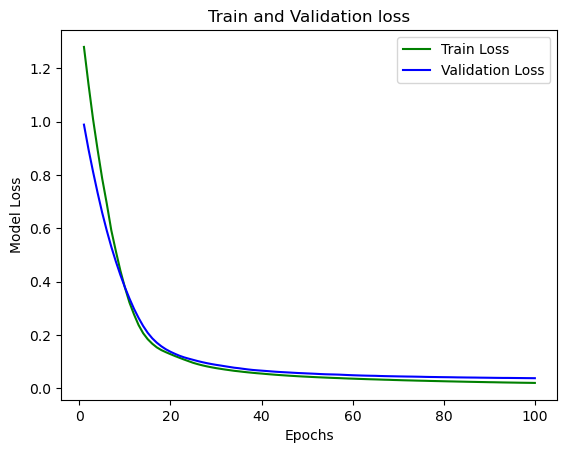

In [20]:
training_loss = ann_model.history['loss']
testing_loss = ann_model.history['val_loss']

epochs = range(1,101)
plt.plot(epochs, training_loss, 'g', label='Train Loss')
plt.plot(epochs, testing_loss, 'b', label='Validation Loss')
plt.title('Train and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Model Loss')
plt.legend()
plt.show()

In [21]:
model_acc_score = ann.evaluate(X_test, y_test, verbose = 0) 
print('Test loss:', round(model_acc_score[0],4)) 
print('Test accuracy:', round(model_acc_score[1],4))

Test loss: 0.0375
Test accuracy: 0.925


In [22]:
model_acc_score = ann.evaluate(X_train, y_train, verbose = 0) 
print('Train loss:', round(model_acc_score[0],4)) 
print('Train accuracy:', round(model_acc_score[1],4))

Train loss: 0.0196
Train accuracy: 0.9565
